In [14]:
library('tidyverse')
library('rvest')
library('lubridate')
library('scales')
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 6)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [4]:
scrape_table = function(i, MF='Women\'s') {
    url = "https://www.baa.org/races/boston-marathon/results/champions"
    webpage = xml2::read_html(url)
    tbl = html_nodes(webpage, "table")[[i]] %>%
        html_table() %>%
        drop_na() %>%
        magrittr::set_colnames(c('year', 'name', 'country', 'time')) %>%
        mutate(time = hms(time)) %>%
        mutate(race.time = as.numeric(time, 'hours')) %>%
        mutate(MF = MF) %>%
        mutate(
            country.simple = ifelse(
                country %in% c('United States', 'Ethiopia', 'Japan', 'Kenya'),
                country,
                'other'
            )
        )
    tbl
}

df.men = scrape_table(1, MF='Men\'s')
df.women = scrape_table(2)

df.marathon = rbind(df.men, df.women)

Let's re-create this chart from FiveThirtyEight

<center>
    <img src="https://fivethirtyeight.com/wp-content/uploads/2018/04/wezerek-marathon-0416-13.png"
         style="width: 600px;"/>
</center>

Preview the data (i.e. `df.marathon`).

In [5]:
df.marathon |> head()

year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2022,Evans Chebet,Kenya,2H 6M 51S,2.114167,Men's,Kenya
2021,Benson Kipruto,Kenya,2H 9M 51S,2.164167,Men's,Kenya
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia


Fill in the table below:

| chart property | column name |
| --- | --- |
| x value | year |
| y value | race.time |
| color | country.simple |
| facet value | MF |
| scale | free_x |
| y label | Winning Time |
| legend | nolegend

Make note of other aesthetic decisions. 
- What's the y-axis title?
- Do the two charts share the same x-axis bounds?
- Is there a legend?

Code your version of the chart below.

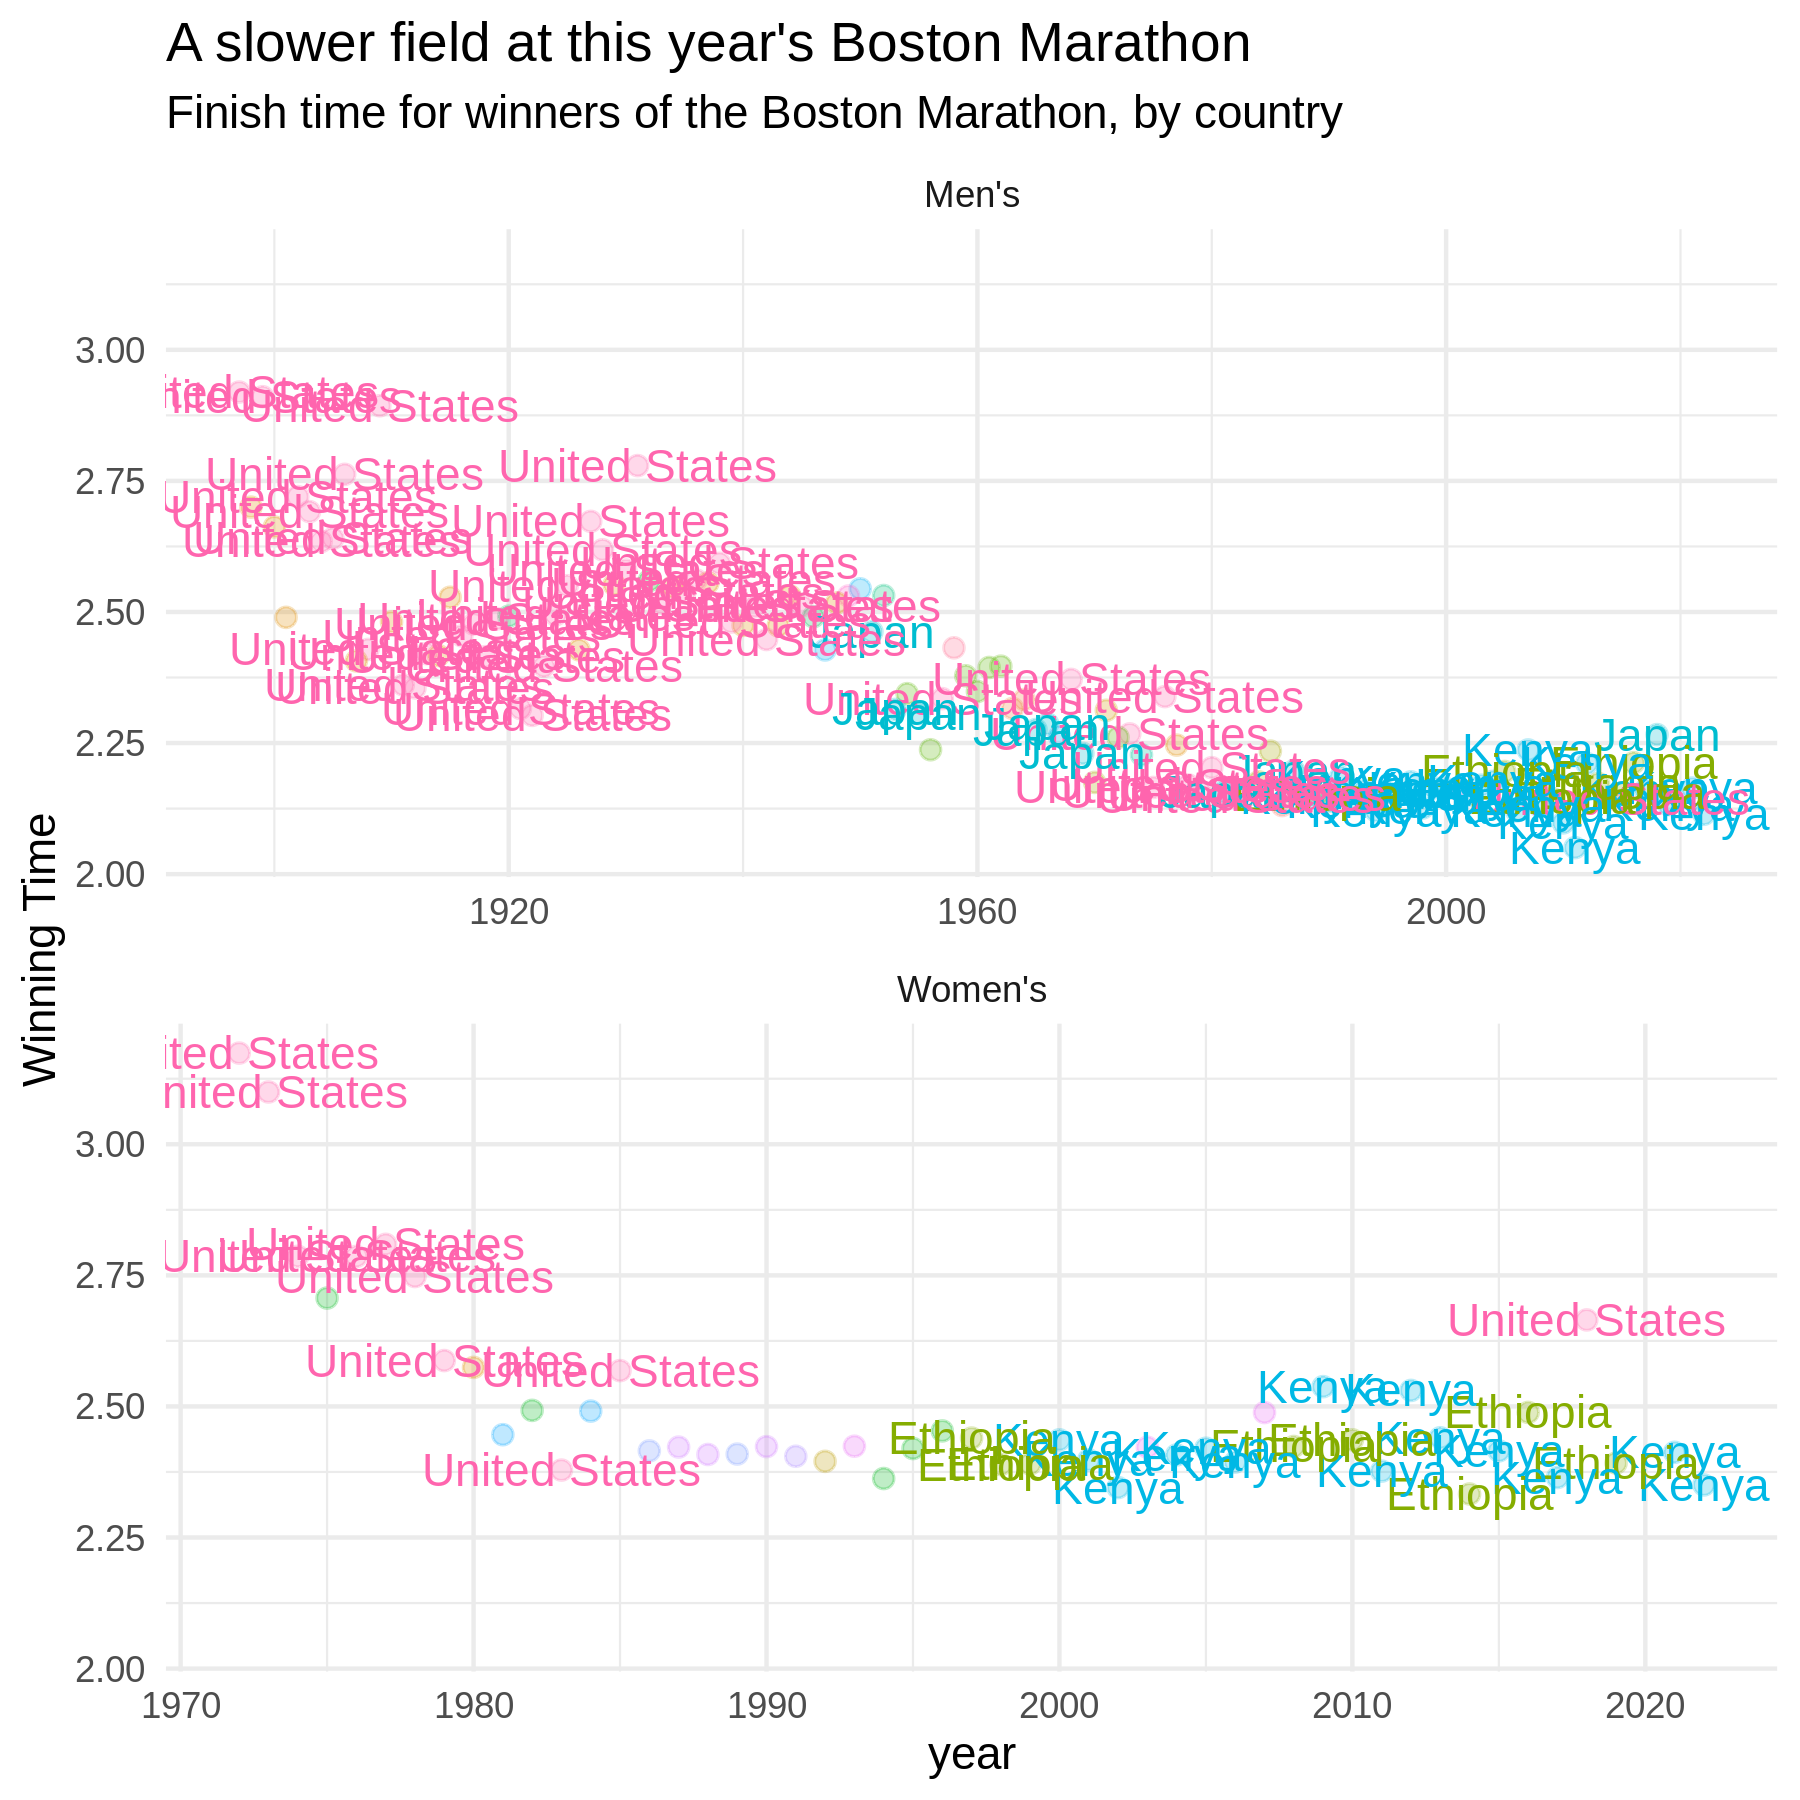

In [19]:
p = ggplot(df.marathon, aes(x = year, y = race.time, color = country,simple)) +
    geom_point(size = 2, alpha = 0.25) + 
    geom_text(data = df.marathon %>% filter(country.simple %in% c('United States', 'Ethiopia', 'Japan', 'Kenya')), 
              aes(label = country.simple)) + 
    facet_wrap(~MF, ncol = 1, scales = 'free_x') + 
    labs(y = 'Winning Time', title = "A slower field at this year's Boston Marathon", subtitle = 'Finish time for winners of the Boston Marathon, by country') +
    theme_minimal() +
    theme(legend.position = 'none')
p

What else might you visualize with this data? (e.g. What about totaling the winners from each country?)